**AGE AND GENDER DETECTION FROM FACIAL IMAGES USING CNN**


Mounting Drive

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Preprocessing**

We have used the UTKFace Dataset from https://www.kaggle.com/datasets/jangedoo/utkface-new

In [ ]:
#Set folder location
f = "/content/drive/MyDrive/UTKFace"

Add all the images of the dataset in this folder

In [ ]:
#Get files from folder
import os
fs = os.listdir(f)

Get images from all files in the said folder

In [ ]:
import cv2
Age = []
Gender = []
Image = []

for i in fs:
  final = f + '/' + i
  print(final)
  image = cv2.imread(final)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(48,48))
  Image.append(image)

Age and gender labels

In [ ]:
for i in fs:
  age_label = int(i.split('_')[0])
  gender_label = int(i.split('_')[1])
  Age.append(age_label)
  Gender.append(gender_label)

Checking an example image from dataset

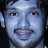

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(Image[0])

Getting respective labels of example image

In [ ]:
print(Age[0])
print(Gender[0])

26
0


Changing lists to numpy arrays

In [ ]:
import numpy as np
images = np.array(Image)
genders = np.array(Gender)
ages = np.array(Age) 

Finding out the number of images belonging to each gender

In [ ]:
values, counts = np.unique(genders, return_counts=True)
print(counts)

[12391 11317]


Plotting Male-female distribution graph

We see that the number of images belonging to both the genders are comparable

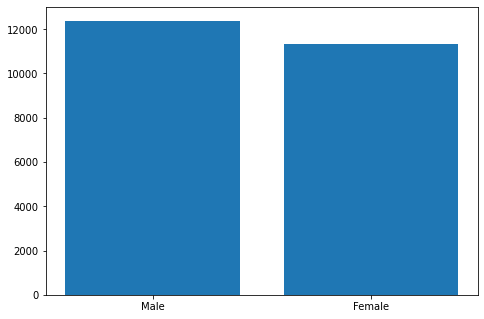

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

Finding the age distribution

In [ ]:
values, counts = np.unique(ages, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [ ]:
val = values.tolist()
cnt = counts.tolist()

Plotting the age distribution graph

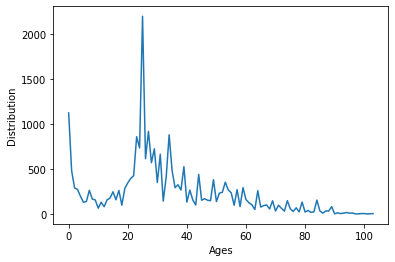

In [ ]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

Creating combined labels of age and gender

In [ ]:
# Creating combined labels of age and gender
labels_final = []

i = 0
for i in range(len(ages)):
  label = []
  label.append([ages[i]])
  label.append([genders[i]])
  labels_final.append(label)
  i+=1

In [ ]:
# Normalising values
images_f_2 = images/255

In [ ]:
# Converting list into numpy array
labels_f = np.array(labels_final)

In [ ]:
images_f_2.shape

(23708, 48, 48, 3)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
#Split dataset into 75% train and 25% test 

X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f,test_size=0.25)

In [ ]:
Y_train[0:5]

array([[[26],
        [ 1]],

       [[58],
        [ 1]],

       [[ 1],
        [ 0]],

       [[26],
        [ 1]],

       [[14],
        [ 1]]])

In [ ]:
Y_train_2 = [Y_train[:,1], Y_train[:,0]]
Y_test_2 = [Y_test[:,1], Y_test[:,0]]

We used a deep convolutional neural network to train our model on the UTK Face dataset. 
Since gender prediction is a binary classification problem and age prediction is a regression problem, sigmoid is used as the output layer for the gender model and RELU is used as the output activation layer for the age model. Moreover we have used ‘binary cross-entropy’ as the loss function for gender and ‘mean absolute error’ as the loss function for age.


In [ ]:
# Defining Convolutional Neural Network
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def CNN(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)

    return x
def Define_Model(input_shape):
  inputs = Input((input_shape))
  
  conv_1 = CNN(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = CNN(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = CNN(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = CNN(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten = Flatten() (maxp_4)
  dense_1 = Dense(64,activation='relu')(flatten)
  dense_2 = Dense(64,activation='relu')(flatten)
  drop_1 = Dropout(0.2)(dense_1)
  drop_2 = Dropout(0.2)(dense_2)
  output_1 = Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2 = Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model

In [ ]:
model = Define_Model((48,48,3))

In [ ]:
#Get Model summary: All the layers in the model

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 48, 48, 32)   896         ['input_3[0][0]']                
                                                                                                  
 dropout_12 (Dropout)           (None, 48, 48, 32)   0           ['conv2d_8[0][0]']               
                                                                                                  
 activation_8 (Activation)      (None, 48, 48, 32)   0           ['dropout_12[0][0]']             
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
fle_s = 'Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss', restore_best_weights = True),
callback_list = [checkpointer, Early_stop]

In [ ]:
# Training model using dataset
History = model.fit(X_train, Y_train_2, batch_size=64, validation_data = (X_test, Y_test_2), epochs=400, callbacks = [callback_list])

Epoch 1/400
278/278 [==============================] - ETA: 0s - loss: 16.8583 - sex_out_loss: 0.6867 - age_out_loss: 15.9962 - sex_out_accuracy: 0.5422 - age_out_accuracy: 0.0475
Epoch 1: val_loss improved from inf to 16.22317, saving model to Age_sex_detection.h5
278/278 [==============================] - 5s 19ms/step - loss: 16.8583 - sex_out_loss: 0.6867 - age_out_loss: 15.9962 - sex_out_accuracy: 0.5422 - age_out_accuracy: 0.0475 - val_loss: 16.2232 - val_sex_out_loss: 0.6669 - val_age_out_loss: 15.4017 - val_sex_out_accuracy: 0.6155 - val_age_out_accuracy: 0.0469
Epoch 2/400
276/278 [============================>.] - ETA: 0s - loss: 14.1043 - sex_out_loss: 0.6232 - age_out_loss: 13.3027 - sex_out_accuracy: 0.6403 - age_out_accuracy: 0.0474
Epoch 2: val_loss improved from 16.22317 to 13.91883, saving model to Age_sex_detection.h5
278/278 [==============================] - 4s 16ms/step - loss: 14.0950 - sex_out_loss: 0.6227 - age_out_loss: 13.2938 - sex_out_accuracy: 0.6411 - age_o

In [ ]:
model.save('Age_sex_detection.h5')

In [ ]:
# Evaluating model using validation data
model.evaluate(X_test, Y_test_2)

186/186 [==============================] - 1s 6ms/step - loss: 7.4648 - sex_out_loss: 0.2569 - age_out_loss: 6.3526 - sex_out_accuracy: 0.8809 - age_out_accuracy: 0.0469


[7.464816570281982,
 0.2568890452384949,
 6.352626323699951,
 0.8808841109275818,
 0.04690399765968323]

In [ ]:
# Predicting using model
pred = model.predict(X_test)

In [ ]:
pred[1]

array([[26.761442],
       [43.60389 ],
       [89.75641 ],
       ...,
       [48.47426 ],
       [36.985542],
       [21.909826]], dtype=float32)

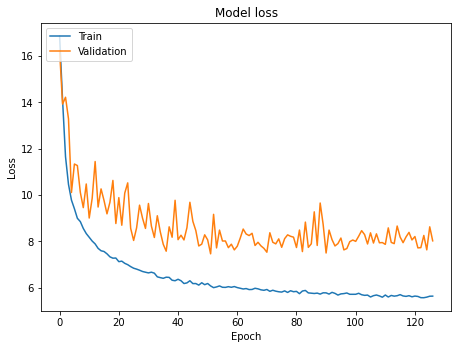

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

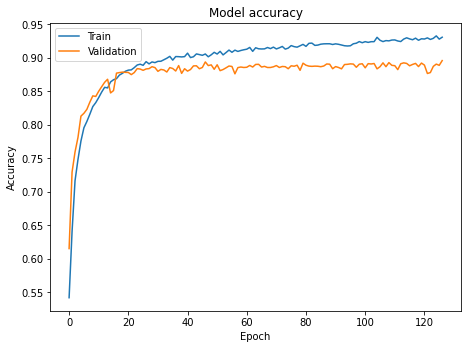

In [ ]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

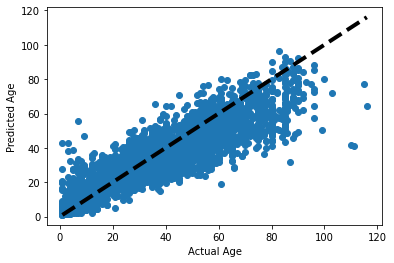

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [ ]:
i=0
Pred_l = []
while(i < len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1

In [ ]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report 

In [ ]:
report = classification_report(Y_test_2[0], Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3057
           1       0.84      0.94      0.88      2870

    accuracy                           0.88      5927
   macro avg       0.89      0.88      0.88      5927
weighted avg       0.89      0.88      0.88      5927



Making the confusion matrix

In [ ]:
results = confusion_matrix(Y_test_2[0], Pred_l)

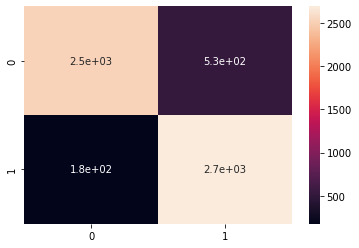

In [ ]:
import seaborn as sns

sns.heatmap(results, annot=True)

In [ ]:
model = Define_Model((48,48,3))

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/UTKModel/Age_sex_detection.h5')

Testing on one image

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=model.predict(np.array([image_test]))
  #print(pred_1)
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Sex: "+ sex_f[sex])


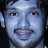

Predicted Age: 13.13
Predicted Sex: Male


In [ ]:
test_image(0,images,images,model)